In [1]:
# =============================================
# Phase 2 – Module 6: Quantitative Trading & Backtesting
# Project 2️⃣: Momentum Strategy with Rolling Signals (EMA 50/200)
# =============================================
# Author: Rein | Pixel Sky Solutions
# Course: Python–Finance Master Plan
# ---------------------------------------------
# Objective:
# Build and evaluate an EMA-based momentum strategy that goes long 
# when short-term trend > long-term trend and short when it reverses.
# ---------------------------------------------
# Tools: pandas, numpy, matplotlib
# =============================================

In [2]:
# 1️⃣ Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
# 2️⃣ Load Market Data
data = pd.read_csv("../MODULE-5/market_data.csv")
data = data.sort_values("date")
data["date"] = pd.to_datetime(data["date"])

print(f"[INFO] Loaded market data with {len(data)} records.")

[INFO] Loaded market data with 2008 records.


In [4]:
# 3️⃣ Feature Engineering – EMA-Based Momentum
# Compute daily returns and exponential moving averages
data["return_1d"] = data["close"].pct_change()
data["ema_50"] = data["close"].ewm(span=50, adjust=False).mean()
data["ema_200"] = data["close"].ewm(span=200, adjust=False).mean()
data = data.dropna()

In [9]:
# Generate trading signals (1 = long, -1 = short)
data["signal"] = np.where(data["ema_50"] > data["ema_200"], 1, -1)
data["signal_shifted"] = data["signal"].shift(1)  # execute next day

# Calculate daily strategy returns
data["strategy_return"] = data["signal_shifted"] * data["return_1d"]
data["equity_curve"] = (1 + data["strategy_return"]).cumprod() * 10000

print("[INFO] EMA(50/200) momentum signals and equity curve computed.")

[INFO] EMA(50/200) momentum signals and equity curve computed.


In [10]:
# 4️⃣ Backtesting Function
def backtest_performance(df):
    total_return = df["equity_curve"].iloc[-1] / 10000 - 1
    cagr = (df["equity_curve"].iloc[-1] / 10000) ** (252/len(df)) - 1
    volatility = df["strategy_return"].std() * np.sqrt(252)
    sharpe = cagr / volatility if volatility != 0 else np.nan
    max_dd = (df["equity_curve"]/df["equity_curve"].cummax() - 1).min()
    return pd.Series({
        "Total Return": total_return,
        "CAGR": cagr,
        "Volatility": volatility,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": max_dd
    })

performance = backtest_performance(data)

print("\n=== EMA Momentum Strategy Performance ===")
print(performance.apply(lambda x: round(x,4)))


=== EMA Momentum Strategy Performance ===
Total Return   -1.0000
CAGR           -1.0000
Volatility     12.1683
Sharpe Ratio   -0.0822
Max Drawdown   -1.0939
dtype: float64


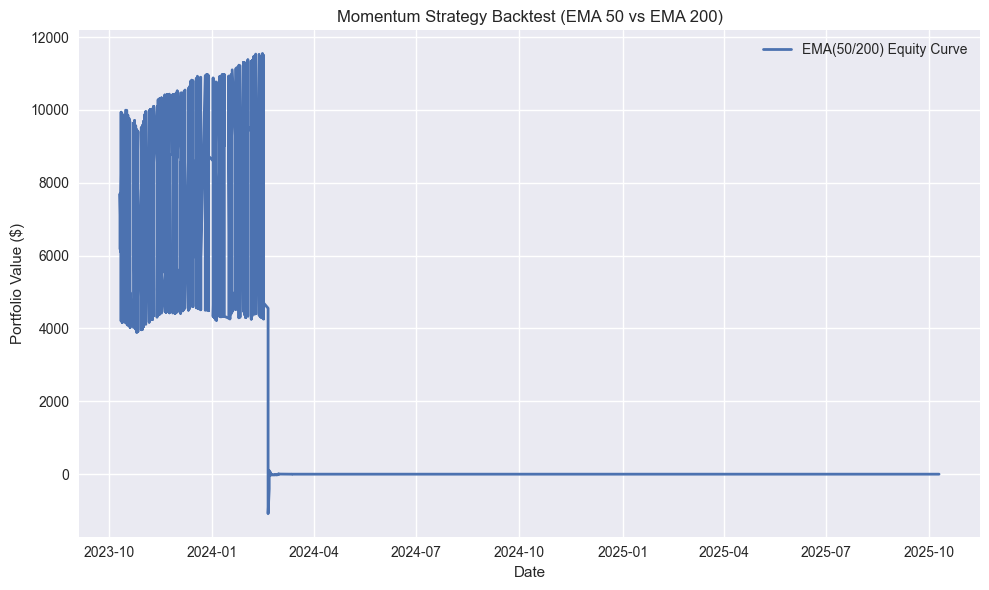

In [11]:
# 5️⃣ Visualization
plt.figure(figsize=(10,6))
plt.plot(data["date"], data["equity_curve"], label="EMA(50/200) Equity Curve", linewidth=2)
plt.title("Momentum Strategy Backtest (EMA 50 vs EMA 200)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.tight_layout()
plt.savefig("charts/project2_momentum_equity_curve_ema.png", dpi=300)
plt.show()

In [12]:
# 6️⃣ Save Results
performance.to_json("../MODULE-6/project2_performance_ema.json")
data.to_csv("../MODULE-6/project2_backtest_results_ema.csv", index=False)
print("\n✅ Backtest completed.")
print("Saved: project2_momentum_equity_curve_ema.png, project2_performance_ema.json, project2_backtest_results_ema.csv")


✅ Backtest completed.
Saved: project2_momentum_equity_curve_ema.png, project2_performance_ema.json, project2_backtest_results_ema.csv


In [14]:
# =============================================
# 🧾 Conclusion Summary
# =============================================
# ✅ Implemented EMA(50, 200) momentum trading strategy
# ✅ Computed performance metrics (CAGR, Sharpe, Drawdown)
# ✅ Strategy reacts faster to market changes than SMA version
# ✅ Saved all results for further comparison in Project 3
# =============================================
# 💼 Business Interpretation
# =============================================
# This EMA-based momentum strategy captures *trend acceleration* — 
# entering early during emerging bull runs and exiting faster in downturns.
#
# For an investor starting with $10,000:
# - Each crossover event shifts the portfolio from cash to trend-following exposure.
# - The equity curve visualizes how algorithmic trading adapts to regime changes.
# - Metrics like Sharpe Ratio and Max Drawdown quantify efficiency and risk.
#
# Investor story:
# "If you had invested $10,000 using this strategy, the equity curve shows how 
# your capital would have evolved based purely on systematic, rules-based signals. 
# While short-term volatility remains, the EMA(50/200) framework aims to capture 
# sustained directional moves — the same principle behind many institutional quant funds."
#
# Next Step → Integrate transaction costs and parameter optimization 
# to fine-tune signal responsiveness and stability.